# Airbnb Price prediction model using feature selection methods.

Connecting to goggle drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [3]:
sy_listings= pd.read_csv('/gdrive/MyDrive/Practicum/Datasets/Sydney-2021/sy_listings.csv')

In [4]:
sy_listings.shape

(20880, 74)

##Data Understanding and Cleaning

In [5]:
sy_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20880 non-null  int64  
 1   listing_url                                   20880 non-null  object 
 2   scrape_id                                     20880 non-null  int64  
 3   last_scraped                                  20880 non-null  object 
 4   name                                          20873 non-null  object 
 5   description                                   20126 non-null  object 
 6   neighborhood_overview                         12589 non-null  object 
 7   picture_url                                   20880 non-null  object 
 8   host_id                                       20880 non-null  int64  
 9   host_url                                      20880 non-null 

Deleting unwanted columns which are not required for predicting prices

In [6]:
unwanted_columns = ['id', 
                   'calendar_updated',
                    'host_location',
                   'listing_url', 
                   'scrape_id', 
                   'host_id',
                   'picture_url', 
                   'host_url', 
                   'host_thumbnail_url', 
                   'host_picture_url', 'host_name','license','name', 'last_scraped','availability_365', 'host_listings_count','host_acceptance_rate','host_about','neighbourhood_group_cleansed','neighborhood_overview' ,'bathrooms','review_scores_accuracy','review_scores_rating','host_neighbourhood','neighbourhood','minimum_minimum_nights','review_scores_accuracy', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights', 'availability_30', 'availability_60', 'calendar_last_scraped', 'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
sy_listings.drop(unwanted_columns, axis=1, inplace=True)

In [7]:
sy_listings.shape

(20880, 33)

Checking the target column "PRICE"

In [8]:
sy_listings.price

0         $65.00
1        $470.00
2         $82.00
3        $130.00
4        $150.00
          ...   
20875     $79.00
20876     $80.00
20877    $150.00
20878    $169.00
20879    $254.00
Name: price, Length: 20880, dtype: object

In [9]:
#removing special characters
sy_listings['price'] = sy_listings['price'].replace({r'\$':'', r'\,':''}, regex = True)
sy_listings.price

0         65.00
1        470.00
2         82.00
3        130.00
4        150.00
          ...  
20875     79.00
20876     80.00
20877    150.00
20878    169.00
20879    254.00
Name: price, Length: 20880, dtype: object

In [10]:
#converting into float datatype
sy_listings['price'] = sy_listings['price'].astype(np.float)
sy_listings.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0         65.0
1        470.0
2         82.0
3        130.0
4        150.0
         ...  
20875     79.0
20876     80.0
20877    150.0
20878    169.0
20879    254.0
Name: price, Length: 20880, dtype: float64

Dealing with missing data

In [11]:
sy_listings.isnull().sum().sort_values(ascending=False)

host_response_time                              12996
host_response_rate                              12996
bedrooms                                         1436
beds                                              904
description                                       754
bathrooms_text                                     24
host_total_listings_count                           3
host_has_profile_pic                                3
host_identity_verified                              3
host_since                                          3
host_is_superhost                                   3
minimum_nights_avg_ntm                              1
maximum_nights_avg_ntm                              1
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count                      0
instant_bookable                                    0
number_of_reviews_ltm                               0
number_of_reviews           

In [12]:
#checking % of missing values
missing_percent_sy = sy_listings.isnull().sum(axis =0) /sy_listings.shape[0] *100
missing_percent_sy

description                                      3.611111
host_since                                       0.014368
host_response_time                              62.241379
host_response_rate                              62.241379
host_is_superhost                                0.014368
host_total_listings_count                        0.014368
host_verifications                               0.000000
host_has_profile_pic                             0.014368
host_identity_verified                           0.014368
neighbourhood_cleansed                           0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms_text                                   0.114943
bedrooms                                         6.877395
beds          

(array([30.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.        ,  6.22413793, 12.44827586, 18.67241379, 24.89655172,
        31.12068966, 37.34482759, 43.56896552, 49.79310345, 56.01724138,
        62.24137931]),
 <a list of 10 Patch objects>)

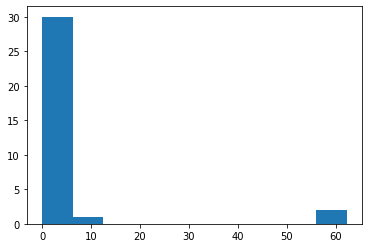

In [13]:
import matplotlib.pyplot as plt
plt.hist(missing_percent_sy)

From the histogram of number of missing value across columns, I decided to drop all the columns with more than 20% of samples are missing

In [14]:
# get the list of all columns with more than 20% samples has missing value 
col_drop_sy = missing_percent_sy[missing_percent_sy > 20].index
col_drop_sy

Index(['host_response_time', 'host_response_rate'], dtype='object')

In [15]:
# drop those columns 
sy_listings = sy_listings.drop(col_drop_sy, axis =1 )

In [16]:
# look at the data with few missing value 
few_missing_col_sy = missing_percent_sy[(missing_percent_sy>0) & (missing_percent_sy <0.2)].index.tolist()
few_missing_col_sy 

#listings[few_missing_col]

['host_since',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'bathrooms_text',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

Imputation for missing value.
For numeric columns, I will do imputation the missing value with the mean.

For categorical columns I will do imputation the missing value with the mode.

In [17]:
sy_listings.isnull().sum().sort_values(ascending=False)

bedrooms                                        1436
beds                                             904
description                                      754
bathrooms_text                                    24
host_total_listings_count                          3
host_has_profile_pic                               3
host_identity_verified                             3
host_is_superhost                                  3
host_since                                         3
minimum_nights_avg_ntm                             1
maximum_nights_avg_ntm                             1
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count                     0
instant_bookable                                   0
number_of_reviews_ltm                              0
number_of_reviews                                  0
availability_90                                    0
has_availability                              

In [18]:
sy_listings.dtypes

description                                      object
host_since                                       object
host_is_superhost                                object
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [19]:
sy_listings.bathrooms_text

0         1 shared bath
1               3 baths
2        1 private bath
3                1 bath
4                1 bath
              ...      
20875    1 private bath
20876               NaN
20877            1 bath
20878           2 baths
20879         1.5 baths
Name: bathrooms_text, Length: 20880, dtype: object

In [20]:
#extracted bath numbers from bathrooms_text 
sy_listings["bath"] = sy_listings["bathrooms_text"].str.extract("(\d*\.?\d+)", expand=True)

In [21]:
#drop bathroom_text
sy_listings = sy_listings.drop(columns=['bathrooms_text'])

In [22]:
#converting bath from integer to float
sy_listings['bath'] = sy_listings['bath'].astype(float)

In [23]:
sy_listings.bath

0        1.0
1        3.0
2        1.0
3        1.0
4        1.0
        ... 
20875    1.0
20876    NaN
20877    1.0
20878    2.0
20879    1.5
Name: bath, Length: 20880, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy = 'mean')

numeric_col = ['beds','bedrooms','host_total_listings_count','minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'bath']
 
data = imputer1.fit_transform(sy_listings[numeric_col])

sy_listings[numeric_col] = pd.DataFrame(data, columns = numeric_col)

sy_listings[numeric_col].head()

,beds,bedrooms,host_total_listings_count,minimum_nights_avg_ntm,maximum_nights_avg_ntm,bath
0,2.039848,1.0,1.0,90.0,180.0,1.0
1,3.000000,3.0,2.0,2.0,22.0,3.0
2,1.000000,1.0,3.0,2.0,90.0,1.0
3,1.000000,1.0,1.0,90.0,365.0,1.0
4,1.000000,1.0,1.0,2.0,90.0,1.0


In [25]:
#categorical
categorical_col = ['host_is_superhost','host_identity_verified', 'host_has_profile_pic']

sy_listings[categorical_col].head()

,host_is_superhost,host_identity_verified,host_has_profile_pic
0,f,f,t
1,t,t,t
2,f,t,t
3,t,t,t
4,t,t,t


In [26]:
# initiate the imputer 

imputer2 = SimpleImputer(strategy = 'most_frequent')

data = imputer2.fit_transform(sy_listings[categorical_col])

# transform the array back to DataFrame 

sy_listings[categorical_col] = pd.DataFrame(data, columns = categorical_col)

In [27]:
sy_listings.isnull().sum().sort_values(ascending=False)

description                                     754
host_since                                        3
price                                             0
calculated_host_listings_count_shared_rooms       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count                    0
instant_bookable                                  0
number_of_reviews_ltm                             0
number_of_reviews                                 0
availability_90                                   0
has_availability                                  0
maximum_nights_avg_ntm                            0
minimum_nights_avg_ntm                            0
maximum_nights                                    0
minimum_nights                                    0
amenities                                         0
beds                                              0
bedrooms                                          0
accommodates

In [28]:
sy_listings = sy_listings.drop(columns=['description', 'host_since', 'host_verifications', 'amenities'])


In [29]:
sy_listings.isnull().sum()

host_is_superhost                               0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
has_availability                                0
availability_90                                 0
number_of_reviews                               0


## EXPLORATORY ANALYSIS

In [30]:
# Number of listings per neighbourhood
sy_listings.groupby("neighbourhood_cleansed").agg({'calculated_host_listings_count':'count'}).sort_values(by="calculated_host_listings_count", ascending=False).reset_index()[:10]

,neighbourhood_cleansed,calculated_host_listings_count
0,Sydney,4931
1,Waverley,2822
2,Randwick,1828
3,Warringah,1036
4,Manly,1002
5,Pittwater,868
6,Woollahra,823
7,North Sydney,772
8,Marrickville,632
9,Rockdale,507


In [31]:
def binary_count_and_price_plot(col, figsize=(8,3)):
   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80)
    
    sy_listings.groupby(col).size().plot(kind='bar', ax=ax1, color=['#ff5a5f', '#00a698'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    sy_listings.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['#ff5a5f', '#00a698'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price per night ($)')

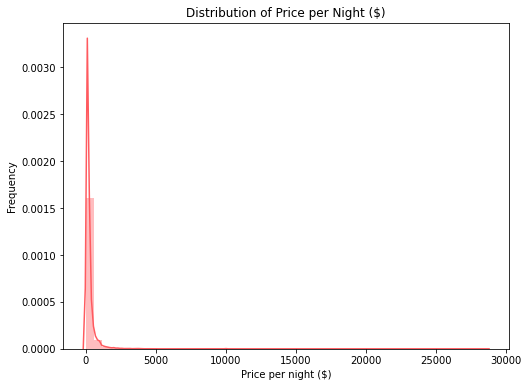

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sy_listings['price'], color='#ff5a5f', ax=ax)
plt.title("Distribution of Price per Night ($)")
plt.ylabel('Frequency')
plt.xlabel("Price per night ($)")

In [33]:
sy_listings['price'].describe()

count    20880.000000
mean       251.166188
std        498.598911
min         13.000000
25%         80.000000
50%        140.000000
75%        250.000000
max      28613.000000
Name: price, dtype: float64

Price per Night
Mean price is 251.16.Data is skewed to the right. Range of price is 0.00 euros, also there are outliers as cost cannot be 0 per night

In [34]:
# Top 3 most expensive listings
sy_listings.sort_values('price', ascending=False)[:3]

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bath
3592,f,2.0,t,t,Woollahra,-33.88235,151.23129,Private room in residential home,Private room,2,...,t,0,2,0,f,1,0,1,0,2.0
7215,f,1.0,t,t,Willoughby,-33.80046,151.18024,Private room in rental unit,Private room,1,...,t,0,7,0,f,1,0,1,0,0.0
13719,f,27.0,t,t,Woollahra,-33.86940,151.24033,Entire villa,Entire home/apt,10,...,t,43,0,0,f,8,8,0,0,5.5


In [35]:
# Top 3 least expensive listings
sy_listings.sort_values('price')[:3]


,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bath
8528,f,1.0,t,f,Canterbury,-33.93563,151.11613,Private room in rental unit,Private room,2,...,t,0,0,0,t,1,0,1,0,1.0
19907,f,1.0,t,t,Ashfield,-33.89311,151.13802,Private room in rental unit,Private room,2,...,t,81,0,0,t,1,0,1,0,1.0
16760,f,3.0,t,t,Rockdale,-33.95184,151.10599,Private room in residential home,Private room,1,...,t,66,0,0,f,2,0,2,0,1.5


In [36]:
abc = sy_listings.groupby('accommodates').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
abc.head()

,accommodates,price,calculated_host_listings_count
0,1,55.0,2134
1,2,100.0,8881
2,3,130.0,1346
3,4,193.0,4082
4,5,223.0,972


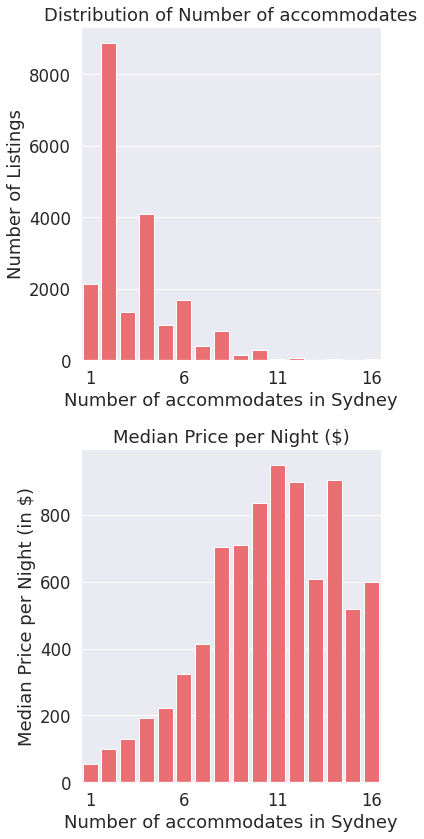

In [37]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=abc['calculated_host_listings_count'], 
    x=abc['accommodates'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of accommodates')
ax1.set_xlabel('Number of accommodates in Sydney')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=abc['price'], 
    x=abc['accommodates'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of accommodates in Sydney')
ax2.set_ylabel('Median Price per Night (in $)')

fig.tight_layout()

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

In [38]:
xyz = sy_listings.groupby('beds').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
xyz.head()

,beds,price,calculated_host_listings_count
0,1.000000,95.0,10197
1,2.000000,165.0,4620
2,2.039848,99.0,904
3,3.000000,249.0,2299
4,4.000000,348.0,1407


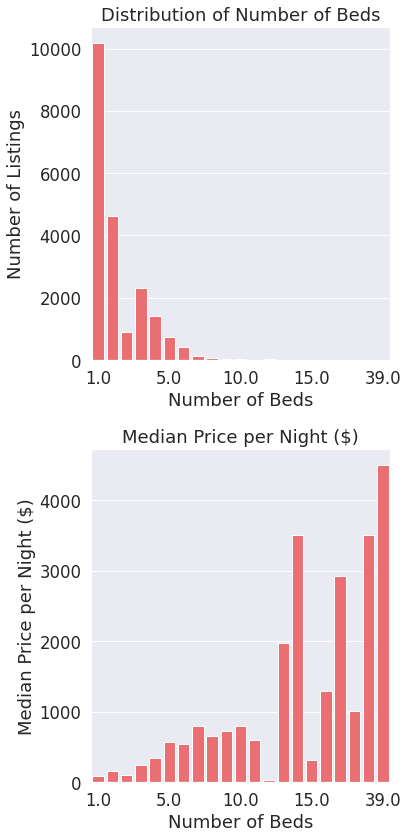

In [39]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=xyz['calculated_host_listings_count'], 
    x=xyz['beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax1.set_title('Distribution of Number of Beds')
ax1.set_xlabel('Number of Beds')
ax1.set_ylabel('Number of Listings')

plot = sns.barplot(
    y=xyz['price'], 
    x=xyz['beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Beds')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
        
fig.tight_layout()

In [40]:
df1 = sy_listings.groupby('bedrooms').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
df1

,bedrooms,price,calculated_host_listings_count
0,1.00000,92.0,11307
1,1.70433,120.0,1436
2,2.00000,200.0,4652
3,3.00000,350.0,1962
4,4.00000,669.5,1082
5,5.00000,921.0,365
6,6.00000,1269.5,64
7,7.00000,1054.5,8
8,10.00000,1783.5,2
9,11.00000,1015.0,1


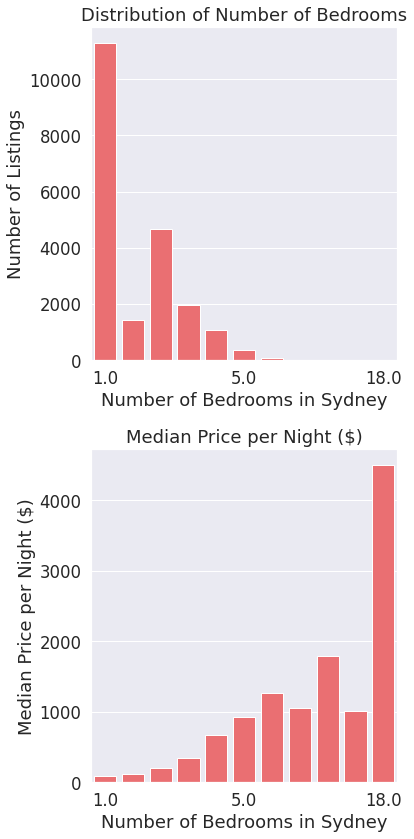

In [41]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['calculated_host_listings_count'], 
    x=df1['bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bedrooms')
ax1.set_xlabel('Number of Bedrooms in Sydney')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price'], 
    x=df1['bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Bedrooms in Sydney')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

In [42]:
df2=sy_listings.query(' bedrooms==18')['room_type']
print(df2)

20567    Entire home/apt
Name: room_type, dtype: object


In [43]:
df1 = sy_listings.groupby('bath').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
df1['bath'] = df1['bath'].round().astype('int64')
df1.head()

,bath,price,calculated_host_listings_count
0,0,78.0,101
1,1,120.0,14291
2,1,90.0,75
3,2,120.0,1268
4,2,240.0,3336


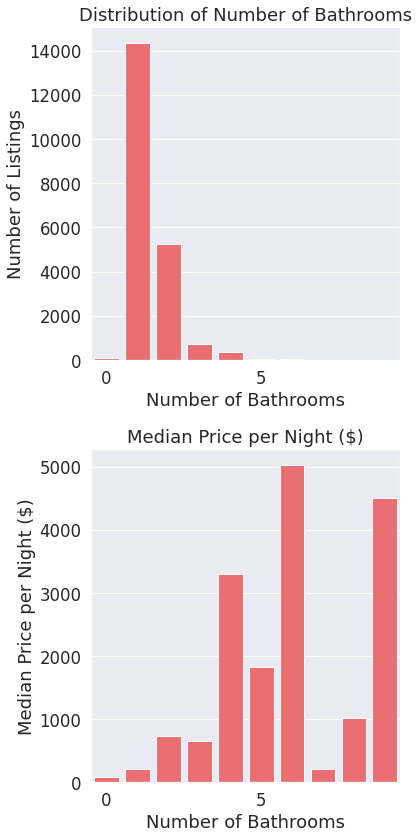

In [44]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['calculated_host_listings_count'], 
    x=df1['bath'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bathrooms')
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price'], 
    x=df1['bath'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Bathrooms')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


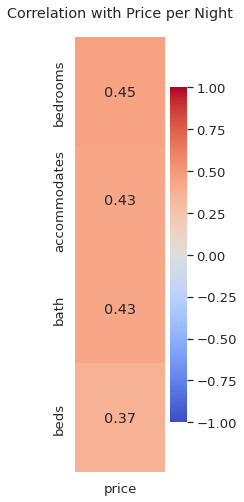

In [45]:
sns.set(font_scale = 1.2)

# Compute correlations
corr = sy_listings[['price','accommodates', 'bedrooms','bath',
          'beds']].corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(2, 8))
ax.set_title('Correlation with Price per Night', pad='20')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price']].sort_values(by=['price'],ascending=False)[1:],
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True);

Neighbourhood

In [46]:
df1 = sy_listings.groupby("neighbourhood_cleansed").agg({'calculated_host_listings_count':'count', 'price':'median'}).reset_index()
df1[:5]

,neighbourhood_cleansed,calculated_host_listings_count,price
0,Ashfield,161,81.0
1,Auburn,267,119.0
2,Bankstown,138,72.0
3,Blacktown,184,70.0
4,Botany Bay,399,80.0


In [47]:
# Top 5 NEIGHBOURHOOD with lowest price_per_night (where count of listings>10)
df3 = df1[df1['calculated_host_listings_count'] >= 10].sort_values(by="price").reset_index()[:5]
df3[:5]

,index,neighbourhood_cleansed,calculated_host_listings_count,price
0,30,Strathfield,120,70.0
1,3,Blacktown,184,70.0
2,2,Bankstown,138,72.0
3,7,Campbelltown,65,72.0
4,10,City Of Kogarah,130,73.0


In [48]:
# Top 5 NEIGHBOURHOOD with highest price_per_night (where count of listings>10)
df2 = df1[df1['calculated_host_listings_count'] >= 10].sort_values(by="price", ascending=False).reset_index()[:5]
df2

,index,neighbourhood_cleansed,calculated_host_listings_count,price
0,26,Pittwater,868,500.0
1,22,Mosman,265,280.0
2,20,Manly,1002,250.0
3,34,Warringah,1036,200.0
4,37,Woollahra,823,180.0


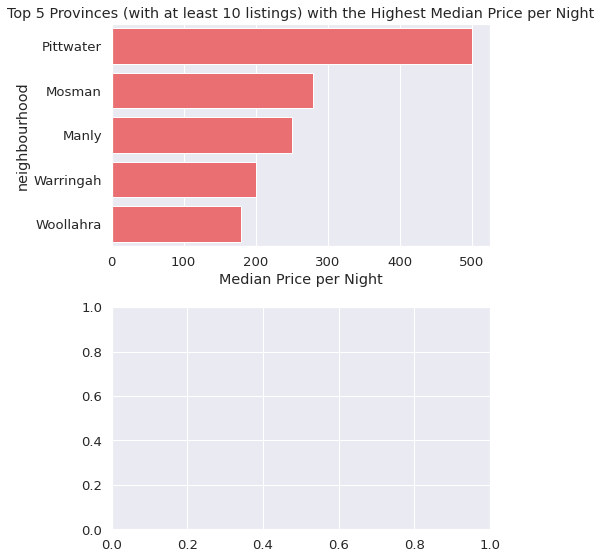

In [49]:
sns.set(font_scale = 1.2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# plot a bar chart
sns.barplot(
    y=df2['neighbourhood_cleansed'], 
    x=df2['price'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Provinces (with at least 10 listings) with the Highest Median Price per Night')
ax1.set_xlabel('Median Price per Night')
ax1.set_ylabel('neighbourhood')


fig.tight_layout()

In [50]:
# Top 5 most expensive Airbnb types
df1 = sy_listings.groupby("property_type").agg({'price':'median','calculated_host_listings_count':'count'}).sort_values(by="price", ascending=False).reset_index()
df1[:5]


,property_type,price,calculated_host_listings_count
0,Entire home/apt,3000.0,3
1,Entire villa,1299.5,104
2,Houseboat,920.0,1
3,Earth house,845.0,2
4,Treehouse,550.0,1


In [51]:
# Top 5 most expensive Airbnb types with more than 10 listings
df2 = df1[df1['calculated_host_listings_count']>=10].sort_values(by="price", ascending=False)[:5]
df2

,property_type,price,calculated_host_listings_count
1,Entire villa,1299.5,104
5,Boat,510.0,12
7,Entire residential home,427.0,3106
8,Farm stay,410.5,10
12,Entire cottage,343.0,94


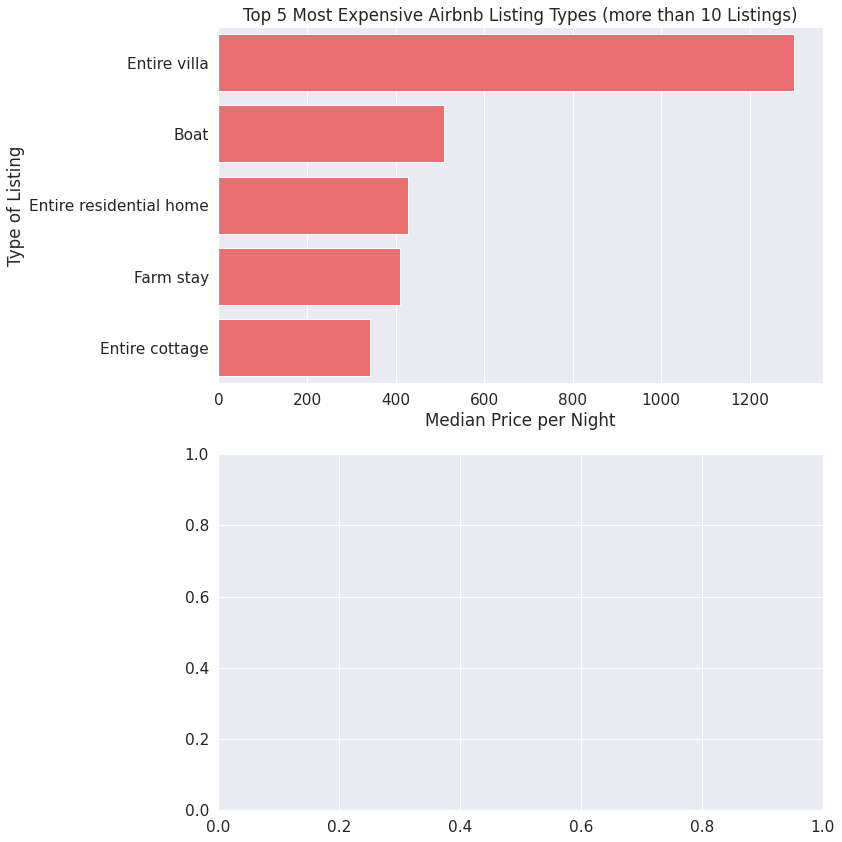

In [52]:
sns.set(font_scale = 1.4)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot a bar chart
sns.barplot(
    y=df2['property_type'], 
    x=df2['price'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Most Expensive Airbnb Listing Types (more than 10 Listings)')
ax1.set_xlabel('Median Price per Night')
ax1.set_ylabel('Type of Listing')

fig.tight_layout()

##Feature Engineering

Encoding for categorical variables

In [53]:
df_num = sy_listings.select_dtypes(exclude=[np.number])
df_num

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,has_availability,instant_bookable
0,f,t,f,Sydney,Private room in rental unit,Private room,t,f
1,t,t,t,Manly,Entire residential home,Entire home/apt,t,f
2,f,t,t,Sydney,Private room in rental unit,Private room,t,t
3,t,t,t,Sydney,Entire loft,Entire home/apt,t,f
4,t,t,t,Mosman,Entire guest suite,Entire home/apt,t,f
...,...,...,...,...,...,...,...,...
20875,f,t,t,Botany Bay,Private room in residential home,Private room,t,t
20876,f,t,t,Botany Bay,Private room in residential home,Private room,t,t
20877,f,t,t,Ryde,Entire rental unit,Entire home/apt,t,f
20878,f,t,t,Botany Bay,Entire rental unit,Entire home/apt,t,f


# Encode binary outcomes

In [54]:
# Encode binary outcomes 
binary_cols=['instant_bookable','has_availability', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
for col in binary_cols:
    sy_listings[col]  = sy_listings[col].map({'t': 1, 'f': 0 })

# Encode multi-categorical outcomes 
multi_cols=['neighbourhood_cleansed','property_type','room_type']
sy_listings =pd.get_dummies(data=sy_listings, columns=multi_cols,drop_first=True)

In [55]:
sy_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in tent,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Train,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,1.0,1,0,-33.867670,151.224970,1,1.00000,2.039848,65.0,...,0,0,0,0,0,0,0,0,1,0
1,1,2.0,1,1,-33.800840,151.263780,6,3.00000,3.000000,470.0,...,0,0,0,0,0,0,0,0,0,0
2,0,3.0,1,1,-33.879640,151.216800,2,1.00000,1.000000,82.0,...,0,0,0,0,0,0,0,0,1,0
3,1,1.0,1,1,-33.878880,151.214390,2,1.00000,1.000000,130.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1,1,-33.817480,151.234840,4,1.00000,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20875,0,17.0,1,1,-33.930222,151.190360,2,1.70433,1.000000,79.0,...,0,0,0,0,0,0,0,0,1,0
20876,0,17.0,1,1,-33.929359,151.187843,2,1.70433,1.000000,80.0,...,0,0,0,0,0,0,0,0,1,0
20877,0,36.0,1,1,-33.781406,151.111693,2,1.00000,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0
20878,0,26.0,1,1,-33.921565,151.191030,4,2.00000,2.000000,169.0,...,0,0,0,0,0,0,0,0,0,0


##Outliers check

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


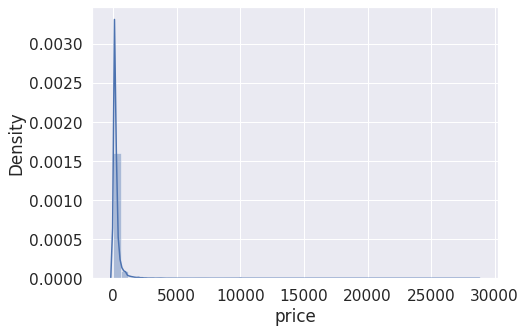

In [56]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(sy_listings['price'])
plt.show()

In [57]:
print("Mean value of cgpa",sy_listings['price'].mean())
print("Std value of cgpa",sy_listings['price'].std())
print("Min value of cgpa",sy_listings['price'].min())
print("Max value of cgpa",sy_listings['price'].max())

Mean value of cgpa 251.1661877394636
Std value of cgpa 498.598911193585
Min value of cgpa 13.0
Max value of cgpa 28613.0


In [58]:
# Finding the boundary values
print("Highest allowed",sy_listings['price'].mean() + 3*sy_listings['price'].std())
print("Lowest allowed",sy_listings['price'].mean() - 3*sy_listings['price'].std())

Highest allowed 1746.9629213202186
Lowest allowed -1244.6305458412915


In [59]:
# Finding the outliers

sy_listings[(sy_listings['price'] > 1086.15) | (sy_listings['price'] < -744.44)]

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in tent,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Train,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
98,1,64.0,1,1,-33.877420,151.222310,6,3.0,2.039848,2746.0,...,0,0,0,0,0,0,0,0,0,0
117,0,1.0,1,1,-33.875480,151.281810,8,5.0,7.000000,1100.0,...,0,0,0,0,0,0,0,0,0,0
127,1,64.0,1,1,-33.594430,151.324110,8,4.0,4.000000,1250.0,...,0,0,0,0,0,0,0,0,0,0
290,0,1.0,1,1,-33.760780,151.297280,8,4.0,4.000000,1500.0,...,0,0,0,0,0,0,0,0,0,0
312,0,53.0,1,1,-33.664200,151.318950,10,5.0,5.000000,2516.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0,18.0,1,1,-33.830889,151.238221,8,5.0,7.000000,4000.0,...,0,0,0,0,0,0,0,0,0,0
20787,0,81.0,1,1,-33.890150,151.275270,6,4.0,3.000000,3750.0,...,0,0,0,0,0,0,0,0,0,0
20812,0,172.0,1,1,-33.832047,151.239290,2,1.0,1.000000,1236.0,...,0,0,0,0,0,0,0,0,0,0
20827,0,32.0,1,1,-33.629052,151.333553,10,6.0,7.000000,3671.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Trimming
sy_listings = sy_listings[(sy_listings['price'] < 250) & (sy_listings['price'] > -744.44)]
sy_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in tent,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Train,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,1.0,1,0,-33.867670,151.224970,1,1.00000,2.039848,65.0,...,0,0,0,0,0,0,0,0,1,0
2,0,3.0,1,1,-33.879640,151.216800,2,1.00000,1.000000,82.0,...,0,0,0,0,0,0,0,0,1,0
3,1,1.0,1,1,-33.878880,151.214390,2,1.00000,1.000000,130.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1,1,-33.817480,151.234840,4,1.00000,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0
5,1,1.0,1,1,-33.889050,151.276530,4,2.00000,2.000000,245.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20874,0,0.0,1,1,-33.890154,151.283343,3,2.00000,2.000000,201.0,...,0,0,0,0,0,0,0,0,0,0
20875,0,17.0,1,1,-33.930222,151.190360,2,1.70433,1.000000,79.0,...,0,0,0,0,0,0,0,0,1,0
20876,0,17.0,1,1,-33.929359,151.187843,2,1.70433,1.000000,80.0,...,0,0,0,0,0,0,0,0,1,0
20877,0,36.0,1,1,-33.781406,151.111693,2,1.00000,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


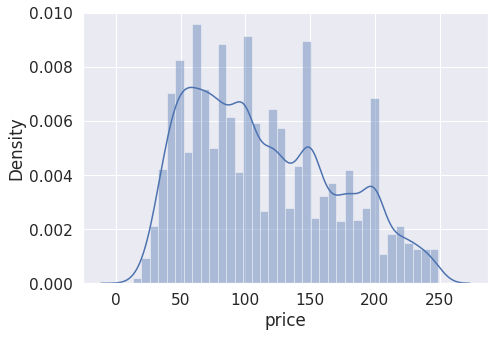

In [61]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(sy_listings['price'])
plt.show()

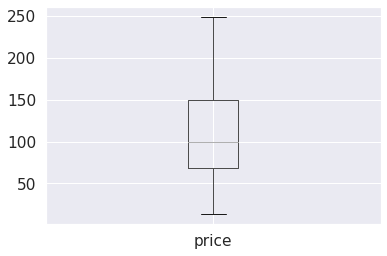

In [62]:
boxplot = sy_listings.boxplot(column=['price'])

In [63]:
sy_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in tent,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Train,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,1.0,1,0,-33.867670,151.224970,1,1.00000,2.039848,65.0,...,0,0,0,0,0,0,0,0,1,0
2,0,3.0,1,1,-33.879640,151.216800,2,1.00000,1.000000,82.0,...,0,0,0,0,0,0,0,0,1,0
3,1,1.0,1,1,-33.878880,151.214390,2,1.00000,1.000000,130.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1,1,-33.817480,151.234840,4,1.00000,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0
5,1,1.0,1,1,-33.889050,151.276530,4,2.00000,2.000000,245.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20874,0,0.0,1,1,-33.890154,151.283343,3,2.00000,2.000000,201.0,...,0,0,0,0,0,0,0,0,0,0
20875,0,17.0,1,1,-33.930222,151.190360,2,1.70433,1.000000,79.0,...,0,0,0,0,0,0,0,0,1,0
20876,0,17.0,1,1,-33.929359,151.187843,2,1.70433,1.000000,80.0,...,0,0,0,0,0,0,0,0,1,0
20877,0,36.0,1,1,-33.781406,151.111693,2,1.00000,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0


##Modelling

Splitting Data


In [64]:
# Splitting data into Input and Target Variable

y = sy_listings[['price']]  # target variable i.e diabetic or not
X = sy_listings.drop(['price'], axis=1)  # input variables

In [65]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [66]:
from sklearn.preprocessing import StandardScaler
#Scaler/normalize 
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [67]:
X.shape

(15458, 147)

#Filter Method

Step:1 Removing Constant features

In [68]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]
print(constant_features)

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

['property_type_Boat', 'property_type_Cave', 'property_type_Dome house', 'property_type_Entire home/apt', 'property_type_Holiday park', 'property_type_Houseboat', 'property_type_Island', 'property_type_Private room in barn', 'property_type_Private room in island', 'property_type_Private room in minsu', 'property_type_Private room in train', 'property_type_Room in bed and breakfast', 'property_type_Shared room in boat', 'property_type_Shared room in cave', 'property_type_Shared room in earth house', 'property_type_Treehouse']


((12366, 131), (3092, 131))

Step 2: Removing Quasi-Constant Features

In [69]:
from sklearn.feature_selection import VarianceThreshold

In [70]:
# remove quasi-constant features
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

56

In [71]:
features_to_keep = X_train.columns[sel.get_support()]

In [72]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((12366, 56), (3092, 56))

Step 3 Removing Duplicate Columns

In [73]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [74]:
#Remove duplicated features
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50


0

In [75]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((12366, 56), (3092, 56))

In [76]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [77]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [78]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((12366, 53), (3092, 53))

In [79]:
for feat in X_train:
    if X_train[feat].isnull().mean() > 0:
        print(X_train[feat])

In [80]:
for feat in X_test:
    if X_test[feat].isnull().mean() > 0:
        print(X_test[feat])

XGBoost Regressor

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
rfcm = xgb.XGBRegressor().fit(X_train, y_train)

[19:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [83]:
y_pred = rfcm.predict(X_test) 

In [84]:
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print('Mean squared error before filter method: ', mse)
print('R2 before filter method: ', r2)

Mean squared error before filter method:  1370.580591592368
R2 before filter method:  0.562107135239991


In [85]:

#fitting the data
from xgboost import XGBRegressor
regressor1 = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.9,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=6,
              scale_pos_weight=1,
              seed=27,verbosity=1)#tuning the parameters
regressor1.fit(X_train, y_train)

[19:14:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, gamma=0.1, max_depth=5, min_child_weight=2,
             n_estimators=200, nthread=6, random_state=42, seed=27,
             subsample=0.9)

In [86]:
y_pred_f=regressor1.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor1.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred_f)
print(MSE)
rmse=MSE**(0.5)
print(rmse)
r2= r2_score(y_test, y_pred_f)
print(r2)

0.6700153722656734
1262.090316931542
35.525910501091204
0.5967691736938074


##Step Forward Selection

Step forward feature selection with Random Forest


In [88]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [89]:

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((12366, 53), (3092, 53))

In [90]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  ## Step forward selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [92]:
sfs1 = SFS(RandomForestRegressor(n_jobs=4), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s 

In [93]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['host_total_listings_count', 'accommodates',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',
       'room_type_Private room'],
      dtype='object')

In [94]:
clf = RandomForestRegressor(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train[selected_feat].fillna(0), y_train)


test_pred = clf.predict(X_test[selected_feat].fillna(0))
print('mse on test set: {}'.format(mean_squared_error(y_test, test_pred )))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


mse on test set: 1678.7444721607505


Backward 

In [ ]:
# step backward greedy selection algorithm

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selectio

In [ ]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

In [ ]:
clf = RandomForestRegressor(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train[selected_feat].fillna(0), y_train)


test_pred = clf.predict(X_test[selected_feat].fillna(0))
print('mse on test set: {}'.format(mean_squared_error(y_test, test_pred )))

Recursive Elimination using Xgboost Regressor

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
import xgboost as xgb

In [97]:
# the first step of this procedure consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.9,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=6,
              scale_pos_weight=1,
              seed=27,verbosity=1)

model_all_features.fit(X_train, y_train)

# calculate the r2 in the test set
y_pred_test = model_all_features.predict(X_test)
mse =mean_squared_error(y_test, y_pred_test)
r2_score_all = r2_score(y_test, y_pred_test)
print('Test all features xgb R2 = %f' % (r2_score_all))
print('mse score = %f' % (mse))

[19:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test all features xgb R2 = 0.596769
mse score = 1262.090317


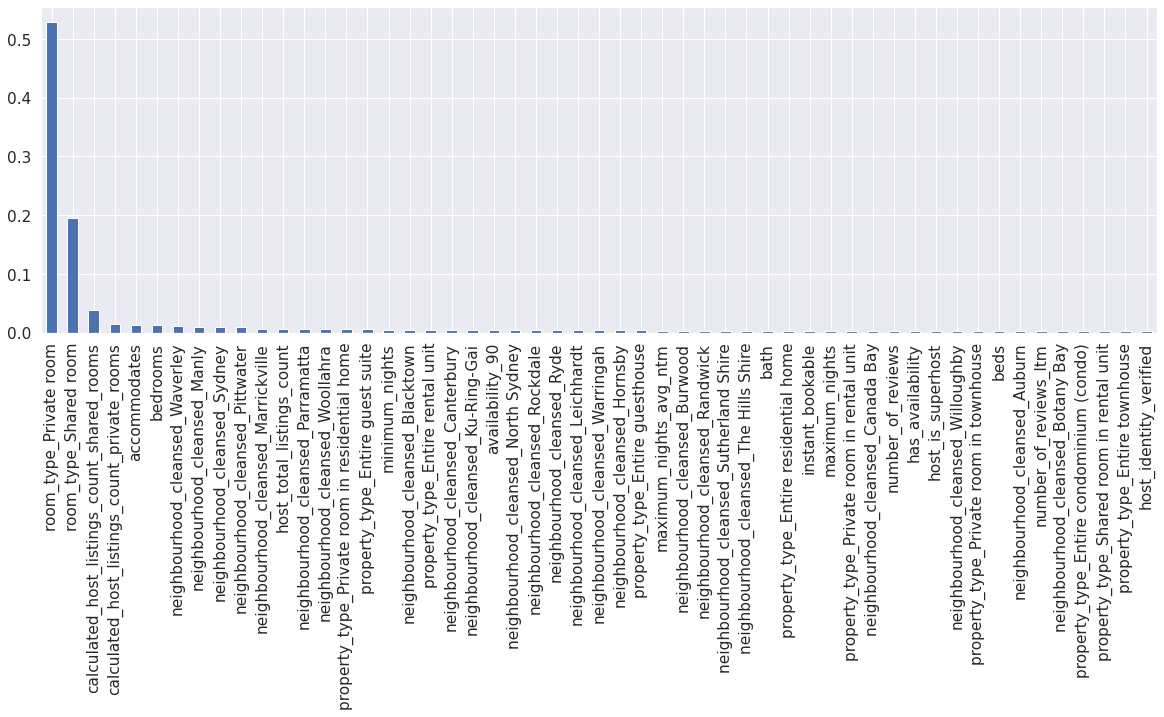

In [98]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=False, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [99]:
# view the list of ordered features
features = list(features.index)
features

['room_type_Private room',
 'room_type_Shared room',
 'calculated_host_listings_count_shared_rooms',
 'calculated_host_listings_count_private_rooms',
 'accommodates',
 'bedrooms',
 'neighbourhood_cleansed_Waverley',
 'neighbourhood_cleansed_Manly',
 'neighbourhood_cleansed_Sydney',
 'neighbourhood_cleansed_Pittwater',
 'neighbourhood_cleansed_Marrickville',
 'host_total_listings_count',
 'neighbourhood_cleansed_Parramatta',
 'neighbourhood_cleansed_Woollahra',
 'property_type_Private room in residential home',
 'property_type_Entire guest suite',
 'minimum_nights',
 'neighbourhood_cleansed_Blacktown',
 'property_type_Entire rental unit',
 'neighbourhood_cleansed_Canterbury',
 'neighbourhood_cleansed_Ku-Ring-Gai',
 'availability_90',
 'neighbourhood_cleansed_North Sydney',
 'neighbourhood_cleansed_Rockdale',
 'neighbourhood_cleansed_Ryde',
 'neighbourhood_cleansed_Leichhardt',
 'neighbourhood_cleansed_Warringah',
 'neighbourhood_cleansed_Hornsby',
 'property_type_Entire guesthouse',
 'm

In [100]:

tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.9,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=6,
              scale_pos_weight=1,
              seed=27,verbosity=1)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train.drop(features_to_remove + [feature], axis=1), y_train)

    # make a prediction over the test set
    y_pred_test = model_int.predict(
        X_test.drop(features_to_remove + [feature], axis=1))

    # calculate the new r2
    r2_score_int = r2_score(y_test, y_pred_test)
    print('New Test r2 = {}'.format((r2_score_int)))

    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_score_all)))

    # determine the drop in the r2
    diff_r2 = r2_score_all - r2_score_int

    # compare the drop in r2 with the tolerance
    # we set previously
    if diff_r2 >= tol:
        print('Drop in r2 ={}'.format(diff_r2))
        print('keep: ', feature)
        print
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in the r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_score_all = r2_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  room_type_Private room  which is feature  1  out of  53
[19:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.5937051970265643
All features Test r2 = 0.5967691736938074
Drop in r2 =0.003063976667243118
keep:  room_type_Private room

testing feature:  room_type_Shared room  which is feature  2  out of  53
[19:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.5944250797302935
All features Test r2 = 0.5967691736938074
Drop in r2 =0.0023440939635139824
keep:  room_type_Shared room

testing feature:  calculated_host_listings_count_shared_rooms  which is feature  3  out of  53
[19:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.5937714873130555
All features Test r2 = 0.5967

In [101]:
# capture the  selected features
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model
final_xgb = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=4,
              scale_pos_weight=1,
              seed=27,verbosity=1)

# fit the model with the selected features
final_xgb.fit(X_train[features_to_keep], y_train)

# make predictions
y_pred_test = final_xgb.predict(X_test[features_to_keep])

# calculate roc-auc
r2_score_final = r2_score(y_test, y_pred_test)
mse =mean_squared_error(y_test, y_pred_test)
print('Test selected features r2 = %f' % (r2_score_final))

print('MSE SCORE = %f' % (mse))

[19:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test selected features r2 = 0.597340
MSE SCORE = 1260.304805


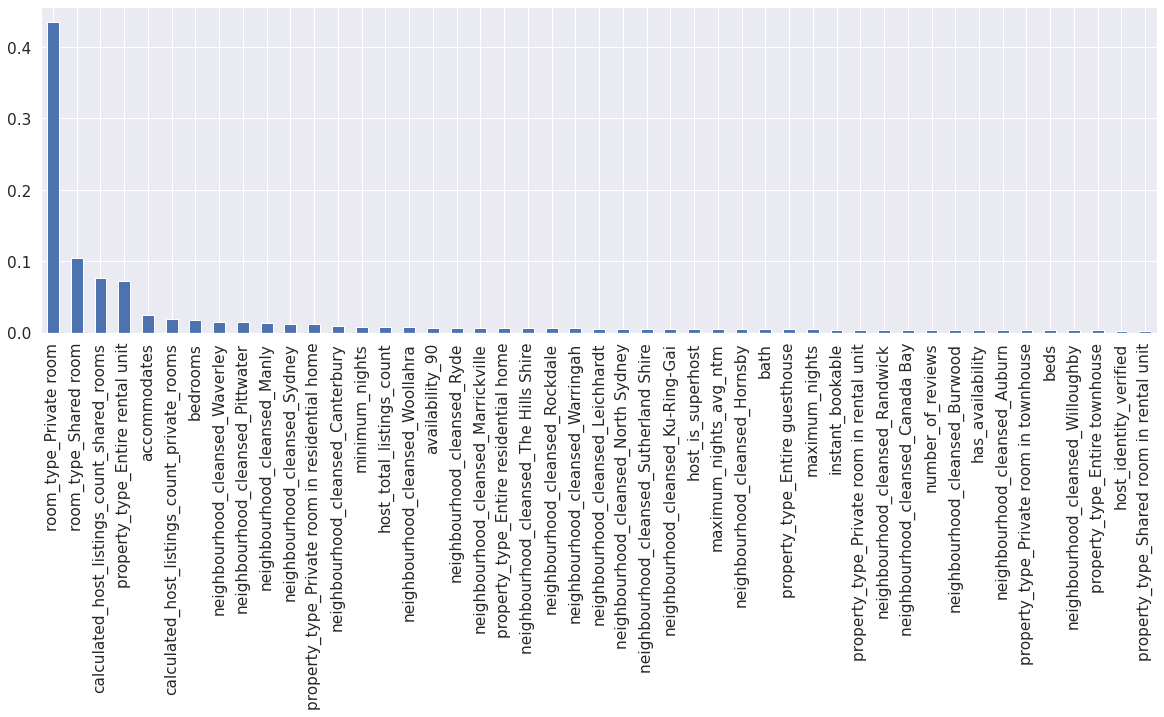

In [102]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(final_xgb.feature_importances_)
features.index = X_train[features_to_keep].columns

# sort the features by importance
features.sort_values(ascending = [False], inplace = True)

# plot
features.plot.bar(figsize=(20,6))

In [103]:
# view the list of ordered features
features = list(features.index)
features

['room_type_Private room',
 'room_type_Shared room',
 'calculated_host_listings_count_shared_rooms',
 'property_type_Entire rental unit',
 'accommodates',
 'calculated_host_listings_count_private_rooms',
 'bedrooms',
 'neighbourhood_cleansed_Waverley',
 'neighbourhood_cleansed_Pittwater',
 'neighbourhood_cleansed_Manly',
 'neighbourhood_cleansed_Sydney',
 'property_type_Private room in residential home',
 'neighbourhood_cleansed_Canterbury',
 'minimum_nights',
 'host_total_listings_count',
 'neighbourhood_cleansed_Woollahra',
 'availability_90',
 'neighbourhood_cleansed_Ryde',
 'neighbourhood_cleansed_Marrickville',
 'property_type_Entire residential home',
 'neighbourhood_cleansed_The Hills Shire',
 'neighbourhood_cleansed_Rockdale',
 'neighbourhood_cleansed_Warringah',
 'neighbourhood_cleansed_Leichhardt',
 'neighbourhood_cleansed_North Sydney',
 'neighbourhood_cleansed_Sutherland Shire',
 'neighbourhood_cleansed_Ku-Ring-Gai',
 'host_is_superhost',
 'maximum_nights_avg_ntm',
 'neighb

##Embedded Techniques

Lasso

In [104]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel

In [105]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale
# them

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [106]:
sel_ = SelectFromModel(Lasso(alpha=90))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=90))

In [107]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [108]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))


total features: 53
selected features: 0
features with coefficients shrank to zero: 53


In [109]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from numpy import arange

In [110]:
best_alpha = 0.00099
regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)


In [111]:
from sklearn.metrics import r2_score as ac

In [112]:
mse = mean_squared_error(y_test, y_pred)
r2= ac(y_test, y_pred)
print('Mean squared error without PCA: ', mse)
print('R2 without PCA: ', r2)

Mean squared error without PCA:  1469.6380125190542
R2 without PCA:  0.5304588410124118


Tree Based

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
#Random Forest Model
rfcm = RandomForestRegressor().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [115]:
#Prediction
y_pred = rfcm.predict(X_test) 

In [116]:
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print('Mean squared error RF: ', mse)
print('R2 RF: ', r2)

Mean squared error RF:  1408.7553796378288
R2 RF:  0.549910503096374


In [117]:
# TODO: Extract the feature importances using .feature_importances_ 
importances = rfcm.feature_importances_
importances

array([5.81155004e-03, 5.98446431e-02, 1.46130670e-02, 5.07708551e-02,
       3.32289280e-02, 2.31475089e-02, 2.40263087e-02, 1.91998153e-02,
       1.57664416e-02, 2.83932736e-03, 5.14775200e-02, 7.24683559e-02,
       1.99968333e-02, 1.79077363e-02, 2.00970866e-02, 1.69351375e-02,
       2.07623317e-02, 2.07361128e-03, 1.11625324e-03, 2.70528018e-03,
       1.83403430e-03, 2.60097530e-03, 2.67923691e-03, 1.71476385e-03,
       2.18720081e-03, 3.22699512e-03, 8.70094569e-03, 4.96518258e-03,
       4.45169362e-03, 3.27161599e-03, 5.54498615e-03, 8.12201256e-03,
       3.73667810e-03, 2.50928590e-03, 2.80876523e-03, 1.24495238e-02,
       1.41849413e-03, 5.77965452e-03, 1.49877688e-02, 2.32130902e-03,
       5.33553614e-03, 1.70398942e-03, 3.58950033e-03, 1.93544138e-03,
       5.91677665e-03, 3.85300403e-03, 1.15803858e-03, 5.32756027e-03,
       7.82989826e-03, 1.62943985e-03, 2.22244326e-04, 3.49089837e-01,
       4.23090204e-02])

In [118]:
## Feature selection and performance comparison 

# Draw a bar chart to see the sorted importance values with feature names.
# Horizontal Bar Chart 
# %matplotlib auto
# %matplotlib inline

# Create a function for feature plot 
def feature_plot(importances, Xp_train, yp_train):
    
    # Display the most important features
    indices = np.argsort(importances)[::-1]
    columns = Xp_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (20,5))
    plt.title("Normalized Weights for First five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

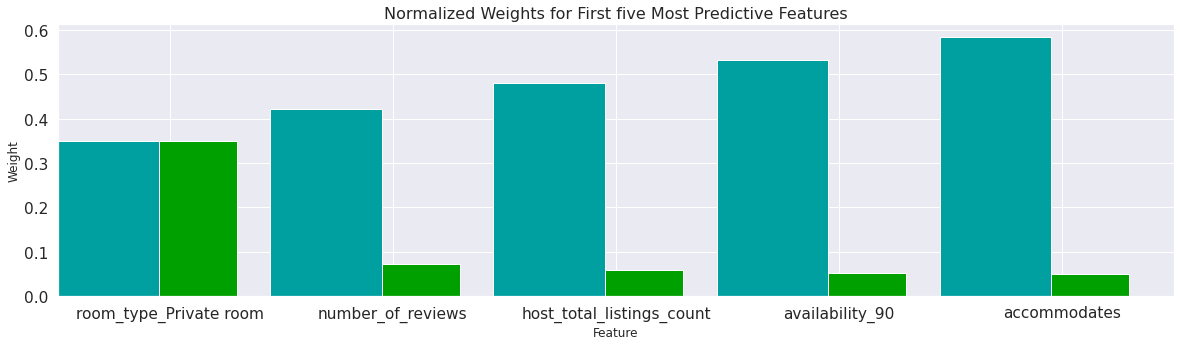

In [119]:
# plot the top five feature importance with feature weight 

feature_plot(importances, X_train, y_train)

Conclusion

According to above results, Recursive elimination with XGBoost regressor worked well with R2 score of 61% and less mean squared error of 1193.48 when compared to other feature selection methods